In [1]:
import numpy as np

In [2]:
# https://web.eecs.umich.edu/~justincj/teaching/eecs442/notes/linear-backprop.html

In [3]:
from typing import Tuple

# dloss_din, dloss_dweights
def get_lin_grad(mat: np.ndarray, X: np.ndarray, upstream_resp_loss: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # divvy up the blame!

    # the loss 'attributed' that we will pass up, (the loss 'attributed' to inputs) is proportonial to the weight mat
    dloss_din = upstream_resp_loss @ mat.T

    # the loss 'attributed' to the weights is directly proportional to the inputs we recieved
    dloss_dweights = X.T @ upstream_resp_loss
    return dloss_din, dloss_dweights

In [4]:
xs = np.linspace(-10, 10, 1000)
ys = xs*10 + 2
xs += np.random.normal(0.,.1, len(xs))

xs = xs.reshape(-1, 1)
ys = ys.reshape(-1, 1)

In [5]:
import matplotlib.pyplot as plt

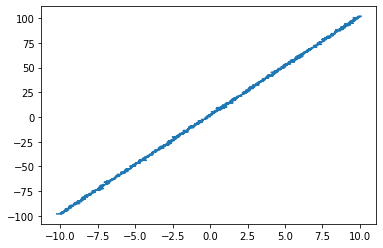

In [6]:
plt.plot(xs, ys)

In [7]:
def mse(y, yexp): return np.mean((y-yexp)**2)

In [8]:
x_with_bias = np.hstack((xs, np.ones((xs.shape[0], 1))))

In [9]:
LR = .001

In [10]:
# t_mat = np.random.normal(0, 1., (2, 1))

# for _ in range(20000):
#     loss = mse(x_with_bias @ t_mat, ys)
#     dloss_dmodel = 2*(x_with_bias @ t_mat - ys)/len(ys)

#     _, dloss_dmat = get_lin_grad(t_mat, x_with_bias, dloss_dmodel)
#     print(f"{loss=}")
#     # print(f"{dloss_dmodel=}")
#     # print(f"{dloss_dmat=}")

#     t_mat += dloss_dmat * -LR

# print(f"{t_mat=}")

In [11]:
t_mat1 = np.random.normal(0, 1., (2, 2))
t_mat2 = np.random.normal(0, 1., (2, 1))

for _ in range(200):
    lay1 = x_with_bias @ t_mat1
    mout = lay1 @ t_mat2

    loss = mse(mout, ys)
    dloss_dmout = 2*(mout - ys)/len(ys)

    dloss_dlay1, dloss_dmat2 = get_lin_grad(t_mat2, lay1, dloss_dmout)

    _, dloss_dmat1 = get_lin_grad(t_mat1, x_with_bias, dloss_dlay1)

    print(f"{loss=}")

    t_mat2 += dloss_dmat2 * -LR
    t_mat1 += dloss_dmat1 * -LR

    print(f"{dloss_dmat2=}")
    print(f"{dloss_dmat1=}")

print(f"{t_mat1 @ t_mat2=}")

loss=4685.912942086611
loss=3167.019739059263
loss=2738.7514532371006
loss=1895.3419895324903
loss=651.5238243268029
loss=14.447558564194857
loss=2.2611272203818595
loss=1.348451108210092
loss=1.2245459670891683
loss=1.202612395373063
loss=1.1921358547810723
loss=1.183343603065593
loss=1.175089159970956
loss=1.1672269966474713
loss=1.1597252670310478
loss=1.152565787613064
loss=1.145732609080555
loss=1.1392106862579836
loss=1.1329856957317315
loss=1.1270439854564924
loss=1.1213725408335375
loss=1.1159589540571928
loss=1.1107913951580435
loss=1.1058585844948317
loss=1.1011497666020382
loss=1.096654685321053
loss=1.0923635601487107
loss=1.088267063740799
loss=1.0843563005115289
loss=1.080622786273235
loss=1.0770584288635479
loss=1.0736555097101022
loss=1.0704066662855694
loss=1.0673048754082837
loss=1.0643434373461027
loss=1.0615159606834241
loss=1.0588163479133366
loss=1.056238781718911
loss=1.0537777119095217
loss=1.051427842979825
loss=1.0491841222607514
loss=1.0470417286334042
loss=1